In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Data Preparation

The first step of a Machine Learning or Analysis process is to gather and prepare your data.

In the current example, we have our data separated in 4 different files. The preparation fase will consist of making sure we are able to open that data in our notebook and put it all together in a DataFrame:

In [11]:
# Using os.listdir() we are able to list the name of all files in a folder:

folder_path = r"C:\Users\ilike\1.data\1.09\1.09_data"

file_names = os.listdir(folder_path)
file_names[:-1]

['file1.xlsx', 'file2.xlsx', 'file3.xlsx', 'file4.xlsx']

In [12]:
# Now we can loop through these file names (except for the "target_table"),
# and we do a .read_excel() to create DataFrames for each:

for file_name in file_names[:-1]:
    print(folder_path + file_name) # here we are putting the string with the path and the name of the file together
    display(pd.read_excel(folder_path +"/"+ file_name).head(5)) 
    print()

C:\Users\ilike\1.data\1.09\1.09_datafile1.xlsx


,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000
1,96093,IL,M,537,365,473.0,0,19387,1,89,415.0,410,5.666667
2,43333,FL,F,725,301,436.0,3,18837,11,17,340.0,361,4.111111
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778
4,190108,FL,F,995,252,348.0,0,17991,5,6,280.0,316,6.000000



C:\Users\ilike\1.data\1.09\1.09_datafile2.xlsx


,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,190579,CA,M,3200,310,343,83,17224,31,32,311,333,3.106061
1,42997,FL,F,1567,392,409,27,18631,4,10,391,434,6.562500
2,132896,OR,F,953,319,455,1,15729,3,45,379,387,15.571429
3,120189,TX,M,492,244,301,3,10818,0,92,260,284,19.375000
4,138829,AZ,feamale,847,185,308,0,11582,3,20,238,225,11.500000



C:\Users\ilike\1.data\1.09\1.09_datafile3.xlsx


,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,119966,TX,F,321,225,281,0,9372,3,68,264,243,8.058824
1,152470,CA,F,5725,610,807,97,53158,13,22,763,698,23.727273
2,48527,AL,Male,931,407,496,0,17743,0,65,502,439,4.416667
3,171528,CA,F,1895,317,471,46,17431,10,62,389,405,6.705882
4,50122,Tennessee,F,715,318,370,2,12416,0,75,340,352,9.250000



C:\Users\ilike\1.data\1.09\1.09_datafile4.xlsx


,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,186307,CA,M,AAA1229,345,438,3,15915,2,58,388,417,16.142857
1,34174,WV,F,529,198,291,0,10816,0,80,218,257,6.083333
2,101388,MO,M,526,340,342,0,9687,0,89,348,321,5.800000
3,159472,CA,F,621,231,279,0,6184,43,41,237,272,11.666667
4,179143,WA,male,1688,496,564,35,22963,2,63,520,521,23.900000


From the code above, we are able to display 4 different DataFrames, one for each of the files on the folder. We can see that:
* they all have the same columns, so they have the exact same name and they are in same position in all DataFrames;
*  the *comma separator (,)* we used to load the files is correct.

Now we need to create some logic to put these DataFrames together. Here is a suggestion:

In [15]:
# 1. We start an empty DataFrame:
df = pd.DataFrame()

# 2. We loop through the file names:
for file_name in file_names[:-1]:
  # 3. We store the DataFrame in a variable:
    df_temp = pd.read_excel(folder_path + "/" + file_name)
  # 4. We concatenate this DataFrame with the "empty" DataFrame we created outside the loop,
  # keeping the same variable name to overwrite the previous DataFrame with the updated one:
    df = pd.concat([df, df_temp])

df

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000
1,96093,IL,M,537,365,473.0,0,19387,1,89,415.0,410,5.666667
2,43333,FL,F,725,301,436.0,3,18837,11,17,340.0,361,4.111111
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778
4,190108,FL,F,995,252,348.0,0,17991,5,6,280.0,316,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,41537,FL,F,742,396,470.0,0,15356,7,37,424.0,450,14.285714
1002,4881,FL,M,599,100,423.0,4,11670,10,27,406.0,200,9.230769
1003,66358,ND,M,593,258,299.0,0,10186,1,70,298.0,274,5.266667
1004,2231,WI,male,564,217,397.0,0,12315,0,96,386.0,295,11.400000


In [16]:
# Now let's remove duplicated rows:
df = df.drop_duplicates()
df

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000
1,96093,IL,M,537,365,473.0,0,19387,1,89,415.0,410,5.666667
2,43333,FL,F,725,301,436.0,3,18837,11,17,340.0,361,4.111111
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778
4,190108,FL,F,995,252,348.0,0,17991,5,6,280.0,316,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,66762,MI,F,632,279,388.0,2,12653,1,71,336.0,339,8.533333
997,6443,FL,M,595,252,274.0,0,11132,8,11,263.0,262,14.692308
998,151175,CA,F,2707,507,537.0,80,16165,24,54,504.0,538,12.117647
999,151504,CA,M,2666,535,653.0,63,24745,22,45,609.0,612,12.333333


In [17]:
# Our target column (the value we want to predict) is in a separate file:
df_target = pd.read_excel(folder_path +"/" + "target_table.xlsx")
df_target

,CONTROLN,TARGET_D
0,44060,100.0
1,96093,7.0
2,43333,5.0
3,21885,38.0
4,190108,5.0
...,...,...
3995,66762,5.0
3996,6443,20.0
3997,151175,22.0
3998,151504,21.0


In [18]:
# We need to merge them together according to the correspondig ID:
df = df.merge(df_target, on="CONTROLN")
df

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,100.0
1,96093,IL,M,537,365,473.0,0,19387,1,89,415.0,410,5.666667,7.0
2,43333,FL,F,725,301,436.0,3,18837,11,17,340.0,361,4.111111,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,38.0
4,190108,FL,F,995,252,348.0,0,17991,5,6,280.0,316,6.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,MI,F,632,279,388.0,2,12653,1,71,336.0,339,8.533333,5.0
3997,6443,FL,M,595,252,274.0,0,11132,8,11,263.0,262,14.692308,20.0
3998,151175,CA,F,2707,507,537.0,80,16165,24,54,504.0,538,12.117647,22.0
3999,151504,CA,M,2666,535,653.0,63,24745,22,45,609.0,612,12.333333,21.0


In [19]:
# It is also a good idea to standardize the column names:
df.columns = df.columns.str.lower()
df

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,100.0
1,96093,IL,M,537,365,473.0,0,19387,1,89,415.0,410,5.666667,7.0
2,43333,FL,F,725,301,436.0,3,18837,11,17,340.0,361,4.111111,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,38.0
4,190108,FL,F,995,252,348.0,0,17991,5,6,280.0,316,6.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,MI,F,632,279,388.0,2,12653,1,71,336.0,339,8.533333,5.0
3997,6443,FL,M,595,252,274.0,0,11132,8,11,263.0,262,14.692308,20.0
3998,151175,CA,F,2707,507,537.0,80,16165,24,54,504.0,538,12.117647,22.0
3999,151504,CA,M,2666,535,653.0,63,24745,22,45,609.0,612,12.333333,21.0


### Data Cleaning

Now we can start the data cleaning step, which consists of:
* checking and adjusting the types of data in each column;
* standardizing categorical columns;
* dealing with the Nans.

#### Data Types
Let's make sure the values within the columns have the correct type:

In [20]:
# Checking types within the columns:
df.dtypes

controln      int64
state        object
gender       object
hv1          object
ic1           int64
ic4         float64
hvp1          int64
ic5          object
pobc1         int64
pobc2         int64
ic2         float64
ic3           int64
avggift     float64
target_d    float64
dtype: object

The types *int* and *float* will represent the numerical variables, while *object* will represent the categorical variables.

"HV1" and "IC5" seems to be off, since we were expecting them to be numerical columns. So let's check them:

In [21]:
# comment
df["hv1"].astype(float)

ValueError: could not convert string to float: 'AAA896'

In [22]:
df["ic5"].astype(float)

ValueError: ignored

From the error above *invalid literal for int() with base 10: 'AAA896'*, we can infer some of the values in column "HV1" incorrectly precede with "AAA".

From the error above *invalid literal for int() with base 10: '10755@'*, we can infer some of the values in column "IC5" are incorrectly followed by "@".

So let's fix that:

In [22]:
# Let's make a function we can apply for both:

# 1. Create an example to test your logic:
x = "AAA896"

# 2. Create the logic:

# 2.1. make an empty string:
only_digits = ""

# 2.2. since we'll be using string operations, make sure the value is a string:
x = str(x)

# 2.3. loop through the characters of the string:
for letter in x:
  # 2.4. check if the character is a digit:
  if letter.isdigit() or letter == ".":
    # 2.5. if the character is a digit, add it to the variable:
    only_digits += letter

# 3. Check if we get the expected result
float(only_digits)

896.0

In [24]:
# 4. Put the logic in a function:

def clean_numerical(x):
    only_digits = ""
    x = str(x)
    for letter in x:
        if letter.isdigit() or letter == ".":
            only_digits += letter
    return float(only_digits) if only_digits else np.nan


# 5. Apply the function to the desired columns:

df1 = df.copy() # since we are going to be altering our dataframe, it is a good idea to do it in a deep copy

df1["hv1"] = df1["hv1"].apply(clean_numerical)
df1["ic5"] = df1["ic5"].apply(clean_numerical)
df1

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d
0,44060,FL,M,896.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,100.0
1,96093,IL,M,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,7.0
2,43333,FL,F,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,5.0
3,21885,NC,M,1095.0,401,413.0,7,14014.0,1,74,407.0,399,27.277778,38.0
4,190108,FL,F,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,MI,F,632.0,279,388.0,2,12653.0,1,71,336.0,339,8.533333,5.0
3997,6443,FL,M,595.0,252,274.0,0,11132.0,8,11,263.0,262,14.692308,20.0
3998,151175,CA,F,2707.0,507,537.0,80,16165.0,24,54,504.0,538,12.117647,22.0
3999,151504,CA,M,2666.0,535,653.0,63,24745.0,22,45,609.0,612,12.333333,21.0


In [25]:
# Now the columns have the types expected:
df1.dtypes

controln      int64
state        object
gender       object
hv1         float64
ic1           int64
ic4         float64
hvp1          int64
ic5         float64
pobc1         int64
pobc2         int64
ic2         float64
ic3           int64
avggift     float64
target_d    float64
dtype: object

#### Standardizing Categorical
Now let's standardize the categorical columns:

In [26]:
# STATE column:

# Checking the different possible values:
df1["state"].value_counts()

CA            752
FL            338
TX            293
IL            248
MI            225
NC            168
WA            153
GA            122
OR            117
WI            110
MO            109
IN            108
California    100
CO             90
AZ             88
SC             85
MN             75
KY             67
AL             59
OK             57
LA             56
TN             52
KS             50
NV             46
IA             44
NM             44
AR             42
MS             33
NE             33
Tennessee      29
MT             24
Cali           24
ID             23
SD             22
UT             21
HI             21
Arizona        17
ND             16
WY             12
AK              6
MD              4
CT              3
AP              3
NJ              2
AA              2
PA              2
NY              1
VA              1
AE              1
VT              1
WV              1
GU              1
Name: state, dtype: int64

In [28]:
# For state we will replace values:

# Remember to follow the steps shown while creating the clean_numericals function.

def clean_state(x):
    x = str(x).lower()
    if x.startswith("ca"):
        return "ca"
    elif x == "tennessee":
        return "tn"
    elif x == "arizona":
        return "az"
    else:
        return x

df2 = df1.copy()

df2["state"] = df2["state"].apply(clean_state)

df2["state"].value_counts()

ca    876
fl    338
tx    293
il    248
mi    225
nc    168
wa    153
ga    122
or    117
wi    110
mo    109
in    108
az    105
co     90
sc     85
tn     81
mn     75
ky     67
al     59
ok     57
la     56
ks     50
nv     46
nm     44
ia     44
ar     42
ms     33
ne     33
mt     24
id     23
sd     22
ut     21
hi     21
nd     16
wy     12
ak      6
md      4
ap      3
ct      3
nj      2
aa      2
pa      2
ny      1
va      1
ae      1
vt      1
wv      1
gu      1
Name: state, dtype: int64

In [29]:
# We have too many different values, which might generate o problem for the ML model (Curse of Dimentionality).
# So, let's bucket the values with smaller counts:

# Create the logic to get the name of the states with low counts:
for ind, val in df2["state"].value_counts().iteritems():
    if val < 100:
        print(ind, val)

co 90
sc 85
tn 81
mn 75
ky 67
al 59
ok 57
la 56
ks 50
nv 46
nm 44
ia 44
ar 42
ms 33
ne 33
mt 24
id 23
sd 22
ut 21
hi 21
nd 16
wy 12
ak 6
md 4
ap 3
ct 3
nj 2
aa 2
pa 2
ny 1
va 1
ae 1
vt 1
wv 1
gu 1


In [30]:
# Let's make it a List Comprehension:
low_states = [ind for ind, val in df2["state"].value_counts().iteritems() if val < 100]
low_states

['co',
 'sc',
 'tn',
 'mn',
 'ky',
 'al',
 'ok',
 'la',
 'ks',
 'nv',
 'nm',
 'ia',
 'ar',
 'ms',
 'ne',
 'mt',
 'id',
 'sd',
 'ut',
 'hi',
 'nd',
 'wy',
 'ak',
 'md',
 'ap',
 'ct',
 'nj',
 'aa',
 'pa',
 'ny',
 'va',
 'ae',
 'vt',
 'wv',
 'gu']

In [31]:
# Now let's replace these states with "others":
df2["state"] = df2["state"].apply(lambda x: "others_low" if x in low_states else "california" if x == "ca" else "others_med")
df2["state"].value_counts()

others_med    2096
others_low    1029
california     876
Name: state, dtype: int64

In [32]:
# GENDER column:
df2["gender"].value_counts()

F          1955
M          1466
male        126
female      106
Female       75
U            68
Male         33
J            23
feamale      15
A             1
Name: gender, dtype: int64

In [33]:
def clean_gender(x):
  x = str(x).lower()
  if x.startswith("m"):
    return "m"
  elif x.startswith("f"):
    return "f"
  else:
    return "o"

df3 = df2.copy()

df3["gender"] = df3["gender"].apply(clean_gender) 
df3["gender"].value_counts()

f    2151
m    1625
o     225
Name: gender, dtype: int64

#### Dealing with Nans
Now we can deal with the Nans:

In [34]:
df3.isna().sum()

controln    0
state       0
gender      0
hv1         2
ic1         0
ic4         1
hvp1        0
ic5         0
pobc1       0
pobc2       0
ic2         1
ic3         0
avggift     0
target_d    0
dtype: int64

In [35]:
# Since we have very few rows with Nans we could drop them.
# Another option is to fill in the Nans with the mean or the median:

df3["hv1"] = df3["hv1"].fillna(df3["hv1"].median()) 
df3["ic4"] = df3["ic4"].fillna(df3["ic4"].median()) 
df3["ic2"] = df3["ic2"].fillna(df3["ic2"].median()) 

df3.isna().sum()

controln    0
state       0
gender      0
hv1         0
ic1         0
ic4         0
hvp1        0
ic5         0
pobc1       0
pobc2       0
ic2         0
ic3         0
avggift     0
target_d    0
dtype: int64

### EDA - Exploratory Data Analysis

Now we can start exploring our data. This step consists in:
* checking the probability distributions within the columns;
* identifying outliers;
* checking the relationships between the columns.

#### Probability Distributions
From the distributions we can will do sanity check, get some insights and validate our sample.

In [36]:
# Let's separate the numerical from the categorical columns:
numerical_columns = df3.select_dtypes("number")
categorical_columns = df3.select_dtypes("object")

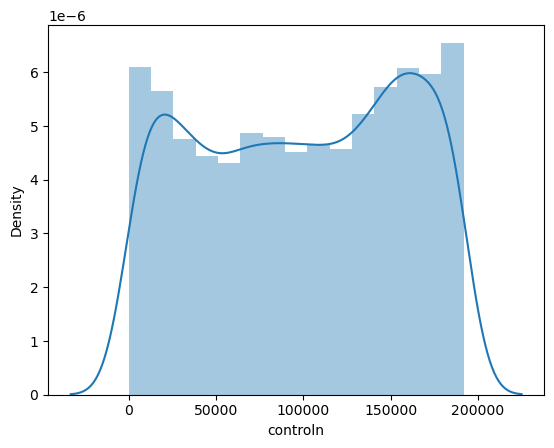

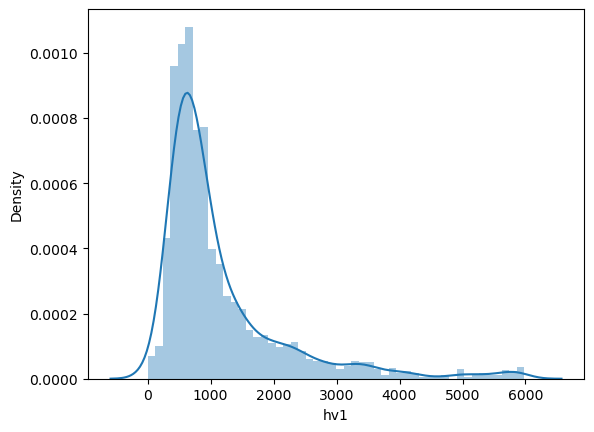

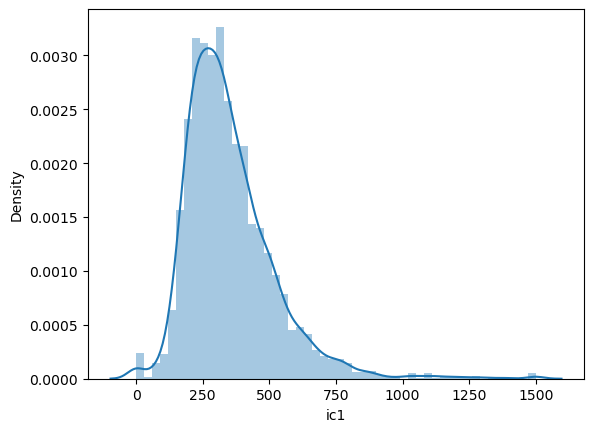

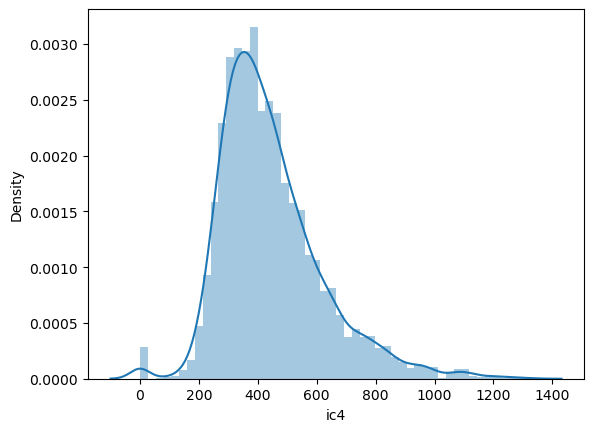

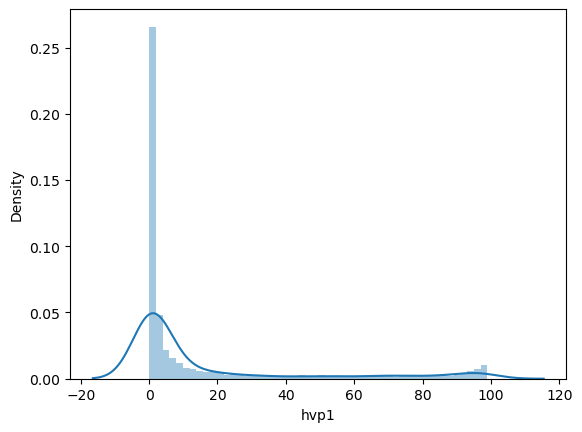

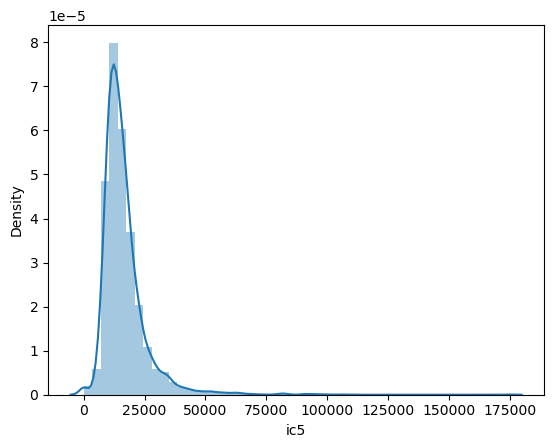

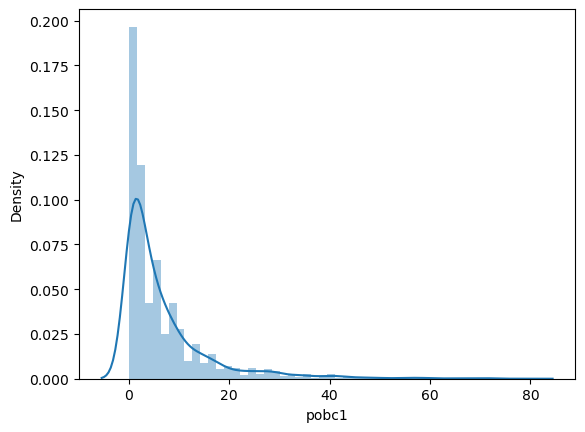

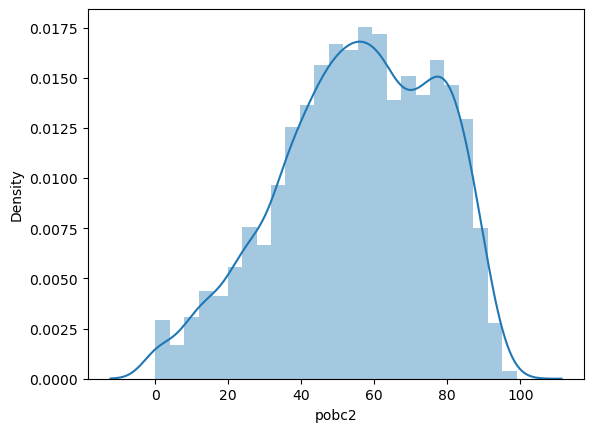

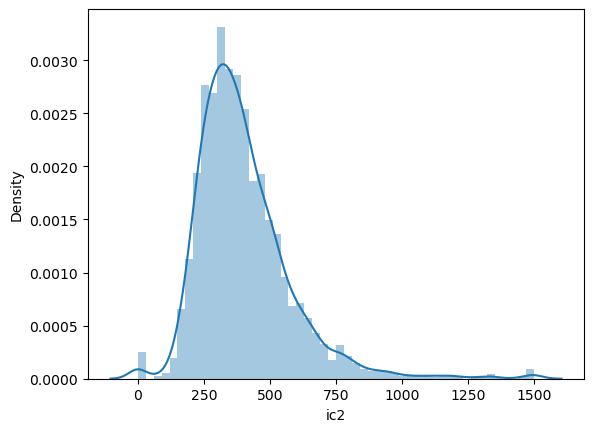

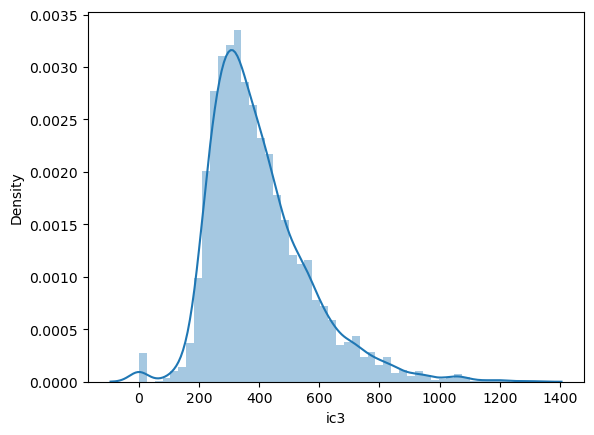

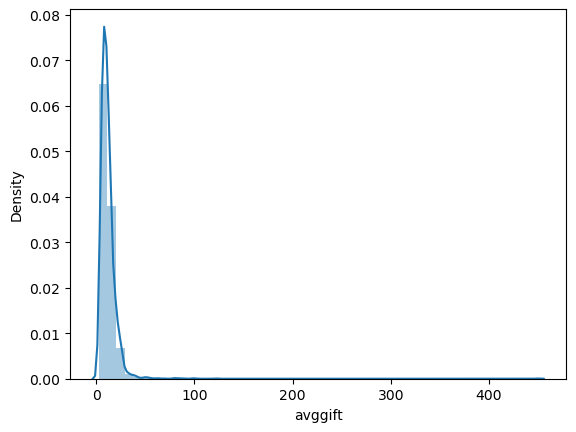

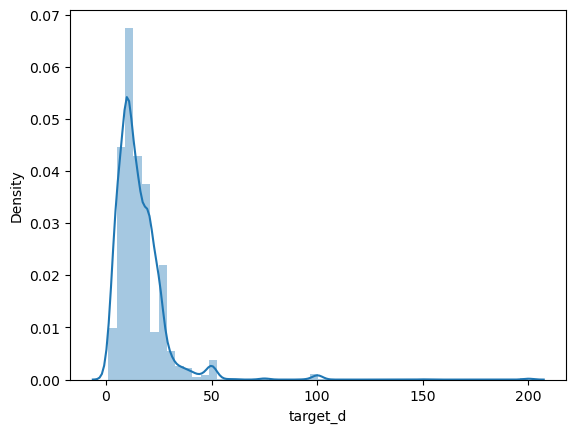

In [37]:
# Let's check the distribution on the numerical columns:
for col in numerical_columns.columns:
    sns.distplot(numerical_columns[col])
    plt.show()

From the distributions we've plotted:
* sanity check: nothing seems too weird in the data;
* insights: example, income and value related variables have a skew in their distributions - it also gives us an idea regarding outliers;
* sample validation: it seems we have a good enough sample since they seem normally distributed.

Other information:
* the "controln" column does not seem normally distributed, the reason is that it is some sort of ID that do not follow a normal distribution.

#### Identifying Outliers

Outliers are values that are too big or too small compared with the rest of the data. 

The existance of outliers in the data may change considerably the interpretation and insights we take, as well as the results of machine learning models.

So it is a good idea to be aware of them early on our analysis:

<AxesSubplot:xlabel='target_d'>

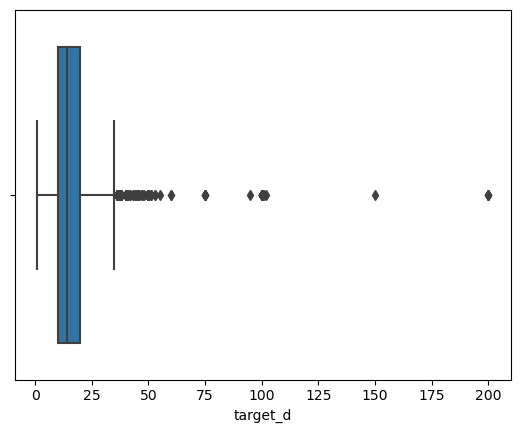

In [39]:
# I like to start checking for outliers on the "target" variable (the information that you are trying to predict):
sns.boxplot(df3["target_d"])

In [40]:
# To calculate the exact outliers range:
IQR = abs(np.quantile(df3["target_d"], .25) - np.quantile(df3["target_d"], .75)) * 1.5
lower_boundary = np.quantile(df3["target_d"], .25) - IQR
upper_boundary = np.quantile(df3["target_d"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-5.0, 35.0)

In [41]:
# We can analyze outliers by using filters:
df3[(df3["target_d"] > 35) | (df3["target_d"] < -5)].sort_values("target_d")

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d
245,168038,california,m,5939.0,1214,1085.0,99,64833.0,19,42,1211.0,1080,20.000000,36.0
1227,169224,california,f,1178.0,482,573.0,0,16952.0,3,48,507.0,543,15.571429,36.0
2189,71744,others_med,m,727.0,148,463.0,2,18187.0,5,63,383.0,260,17.000000,36.0
869,168275,california,o,3373.0,643,729.0,96,29018.0,7,56,682.0,699,13.692308,36.0
1356,93538,others_med,f,438.0,159,156.0,17,3975.0,0,58,146.0,165,20.666667,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,191779,others_med,m,1432.0,636,772.0,24,35544.0,0,44,693.0,680,25.000000,150.0
212,120115,others_med,m,274.0,154,256.0,1,8881.0,6,84,214.0,199,40.875000,200.0
3542,189943,others_med,m,1437.0,385,551.0,29,23079.0,5,19,444.0,480,12.760000,200.0
3647,185080,california,f,2298.0,374,604.0,64,31281.0,12,12,514.0,473,98.785714,200.0


#### Correlations and Relationships

An important part of the analysis is to understand the relationship between the features and the target.

Features are the characteristics of the donors that we will use to predict the target (amount donated).

We need to check 2 important things:
* the correlation between the features and the target (we want them to be as high as possible);
* the correlation amongst the features (we don't want features to be correlated to each other, avoiding multicolinearity).

#### Correlation between the features and the target
This information will tell us how good the features will be to predict the target. Correlation values goes from -1 to 1. The closer to 1 or to -1, the better (the closer to 0, smaller will be the relationship).

In [42]:
# For numerical features we have pearson / spearman correlation measure:
correlations_matrix = numerical_columns.corr()

correlations_matrix["target_d"].sort_values(ascending=False)

target_d    1.000000
avggift     0.487718
ic5         0.138130
ic4         0.131263
ic2         0.130092
ic3         0.121918
hv1         0.116619
ic1         0.113128
hvp1        0.105463
pobc1       0.039454
controln    0.027989
pobc2      -0.072670
Name: target_d, dtype: float64

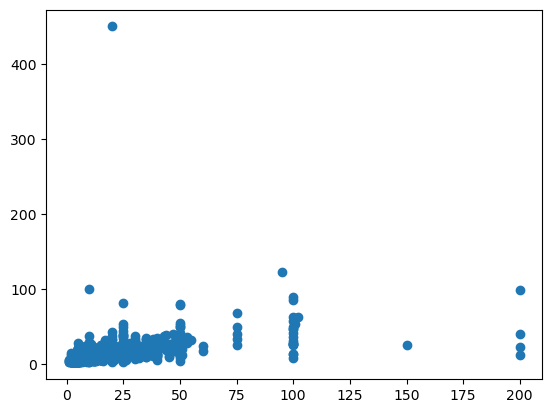

In [43]:
# avggift has the highest correlation, we can see it in a plot:
plt.scatter(df3["target_d"], df3["avggift"])

<AxesSubplot:xlabel='gender', ylabel='target_d'>

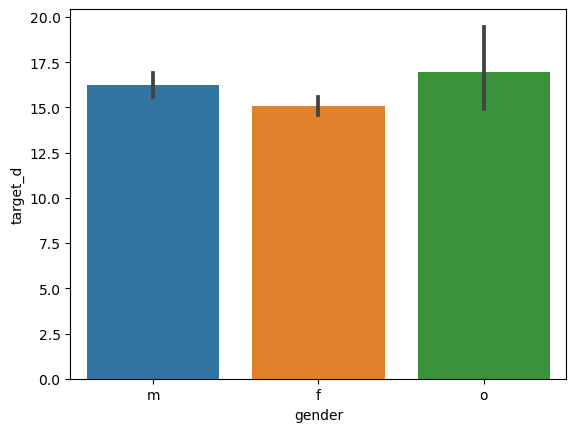

In [44]:
# For now, when analysing categorical we can use barplots:
sns.barplot(x=df3["gender"], y=df3["target_d"])
# from the plot below, we can infer that:
# gender "o" donates a higher average but there is also a higher variance (we might have outliers there)

#### Correlation amongst features - Multicolinearity
The higher the correlation between 2 features, more multicolinaerity we will have. Multicolinearity is something to be avoided in machine learning, since it consists of redundant information. Basically, if two features have a correlation higher than .9, it means that the model will need just one of them, the other feature will be redundant, will not bring new information and might add noise to the model.

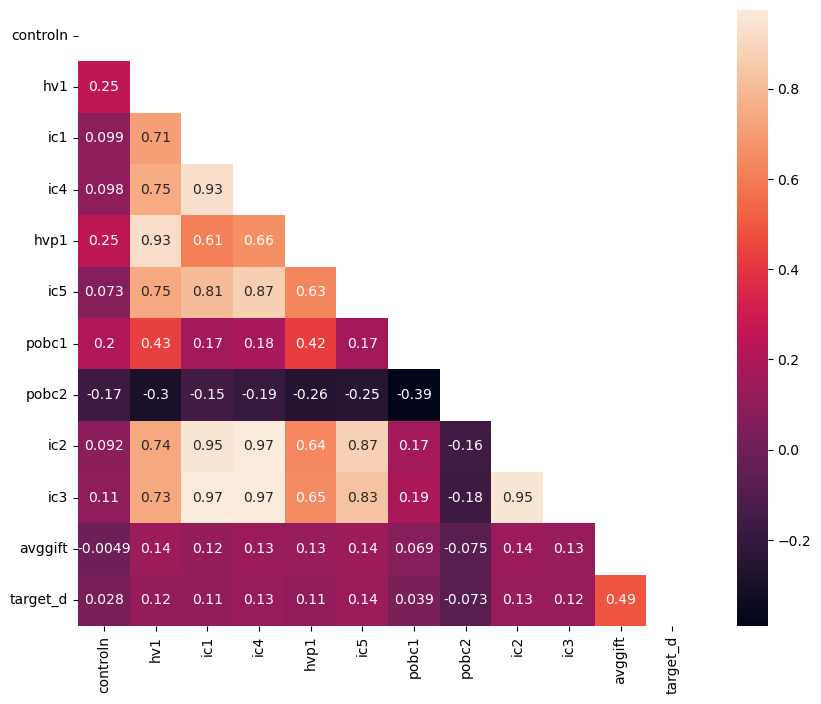

In [45]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# in this example, we could drop columns: ic1, ic2, ic3, hvp1

### Encoding Categorical Variables

Most machine learning algorithms are not coded to handle strings as features for the model. To be able to use that information we need to represent it numerically. For production-ready scripts you will use OneHotEncoder from class 1.07, but here we'll keep it simple.

In [46]:
df_final = df3.copy()
df_final

,controln,state,gender,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d
0,44060,others_med,m,896.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,100.0
1,96093,others_med,m,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,7.0
2,43333,others_med,f,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,5.0
3,21885,others_med,m,1095.0,401,413.0,7,14014.0,1,74,407.0,399,27.277778,38.0
4,190108,others_med,f,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,others_med,f,632.0,279,388.0,2,12653.0,1,71,336.0,339,8.533333,5.0
3997,6443,others_med,m,595.0,252,274.0,0,11132.0,8,11,263.0,262,14.692308,20.0
3998,151175,california,f,2707.0,507,537.0,80,16165.0,24,54,504.0,538,12.117647,22.0
3999,151504,california,m,2666.0,535,653.0,63,24745.0,22,45,609.0,612,12.333333,21.0


In [47]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final

,controln,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d,state_others_low,state_others_med,gender_m,gender_o
0,44060,896.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,100.0,0,1,1,0
1,96093,537.0,365,473.0,0,19387.0,1,89,415.0,410,5.666667,7.0,0,1,1,0
2,43333,725.0,301,436.0,3,18837.0,11,17,340.0,361,4.111111,5.0,0,1,0,0
3,21885,1095.0,401,413.0,7,14014.0,1,74,407.0,399,27.277778,38.0,0,1,1,0
4,190108,995.0,252,348.0,0,17991.0,5,6,280.0,316,6.000000,5.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,632.0,279,388.0,2,12653.0,1,71,336.0,339,8.533333,5.0,0,1,0,0
3997,6443,595.0,252,274.0,0,11132.0,8,11,263.0,262,14.692308,20.0,0,1,1,0
3998,151175,2707.0,507,537.0,80,16165.0,24,54,504.0,538,12.117647,22.0,0,0,0,0
3999,151504,2666.0,535,653.0,63,24745.0,22,45,609.0,612,12.333333,21.0,0,0,1,0


### Splitting the Data

For us to be able to train an algorithm we will need to split the features from the target, also referred to as X-y split.

To make sure our model will not *overfit* and will present similar success results when we use it in real life, we will also be splitting the dataset into training and testing data.

In [43]:
# X-y split: here we keep only the data we will use to train the model
X = df_final.drop(["controln", "target_d"], axis=1)
y = df_final["target_d"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,state_others_low,state_others_med,gender_m,gender_o
3216,474.0,282,331.0,0,9849.0,2,72,332.0,316,20.000000,1,0,0,0
2780,450.0,292,373.0,0,12203.0,2,93,361.0,329,9.500000,0,1,1,0
697,621.0,300,351.0,0,10470.0,0,86,342.0,299,6.705882,0,1,1,0
3570,967.0,434,501.0,3,17052.0,9,20,463.0,478,9.333333,0,1,1,0
2855,569.0,256,317.0,1,9118.0,0,92,270.0,310,6.647059,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2620.0,481,523.0,82,16047.0,48,36,490.0,519,14.428571,0,0,0,0
1294,577.0,375,394.0,0,15853.0,1,74,380.0,389,9.571429,0,1,1,0
860,600.0,254,294.0,0,9800.0,3,16,255.0,292,15.000000,1,0,1,0
3507,835.0,401,537.0,3,20242.0,1,69,423.0,487,3.375000,0,1,0,0


### Feature Scaling

Scaling is important for ensuring that features with different scales or units contribute equally to the machine learning model.

In [44]:
# Start the scaler object:
scaler = StandardScaler()

# Fit the scaler object only on the training data to avoid data leakage:
scaler.fit(X_train)

# Transform training and the testing data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model

In summary, train-test split helps us ensure that the machine learning model we develop is both accurate and generalizable to new data.

In [45]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.33
RMSE: 10.080293976589365
MAE: 6.1111311473882015


What the metrics reveal:

* R2 of -0.8 is very bad, the model might not generalize well.
* MAE of 5.5 might be high, considering that most donations range from 0-35.
* RMSE of 17.2 is more than 3x MAE, which suggests errors with high variance, some errors might be small and other errors might be bigger (usually due to outliers).

### Improving the model

Now we check ways of improving the model. Going back and forth in our process to look for ways to improve it.

<Axes: xlabel='target_d'>

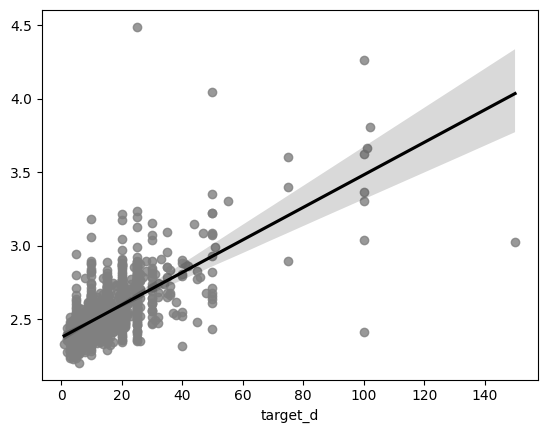

In [64]:
# A good place to start is by getting the regression prot from the predictions vs the true values:
sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})

* The regression plot above explains the low R2. To have an R2 closer to 1, the points would have to be more clustered around the regression line.
* The points being far away from each other suggests that dealing with outliers and/or scaling the target variable could help achieve a better model.

In [47]:
# Log scaling - we will see this on unit 4:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)
# it is not possible to get log of 0 or negative numbers, so we had to create the logic above

y_train_scaled

3216    1.609438
2780    2.564949
697     2.302585
3570    2.484907
2855    2.302585
          ...   
1130    2.890372
1294    2.708050
860     2.995732
3507    1.098612
3174    2.484907
Name: target_d, Length: 2800, dtype: float64

<Axes: xlabel='target_d', ylabel='Density'>

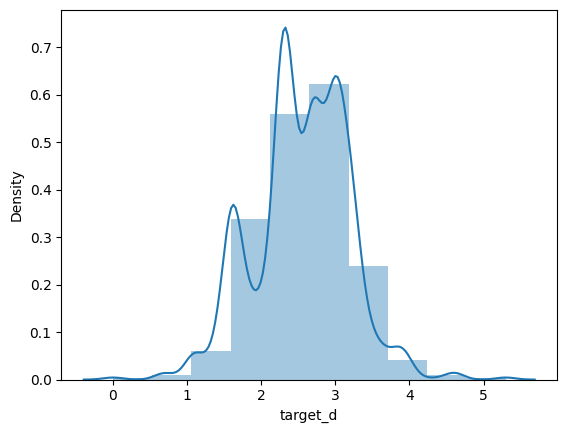

In [48]:
# Look at how log scaling changed the distribution:
sns.distplot(y_train_scaled, bins=10)

<Axes: xlabel='target_d', ylabel='Density'>

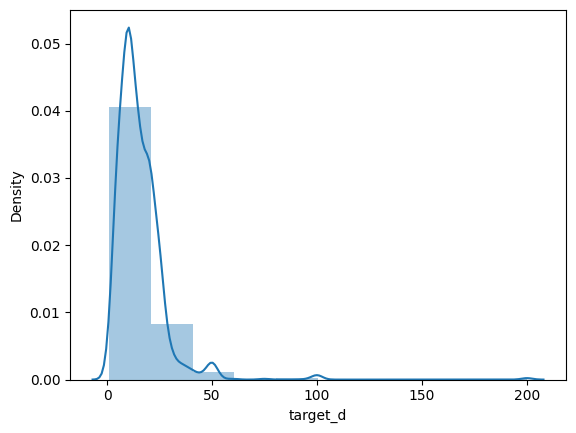

In [49]:
# Compared to what we had before scaling:
sns.distplot(y_train, bins=10) # notice how the skew is reduced in the plot above

In [50]:
# Now let's check the model:

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 
# here we are only checking R2 because MAE and RMSE becomes hard to interpret when we scale the target variable (we will see this in another class)

R2_score: 0.3


<Axes: xlabel='target_d'>

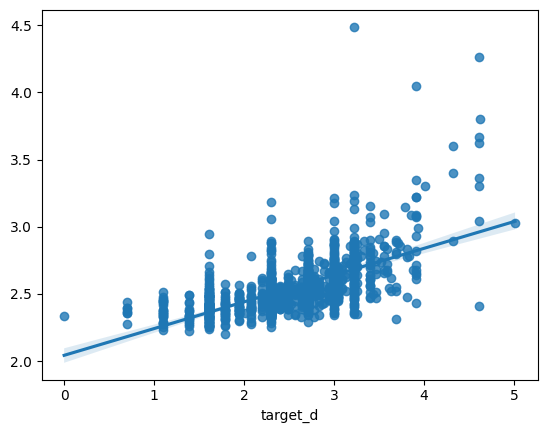

In [54]:
sns.color_palette("colorblind")
sns.regplot(x=y_test_scaled, y=predictions)

There was a slight improvement in R2, we can see on the plot that the points are more clustered around the regression line. We still have considerable errors, we can check where they are coming from:

In [55]:
result_df = X_test
result_df["target"] = y_test
result_df["scaled_target"] = y_test_scaled
result_df["error"] = y_test_scaled - predictions
result_df.sort_values("error", ascending=False)

,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,state_others_low,state_others_med,gender_m,gender_o,target,scaled_target,error
3106,465.0,266,313.0,0,10037.0,1,79,292.0,285,7.733333,0,1,1,0,100.0,4.605170,2.192383
221,1432.0,636,772.0,24,35544.0,0,44,693.0,680,25.000000,0,1,1,0,150.0,5.010635,1.985832
0,896.0,392,520.0,7,21975.0,6,16,430.0,466,28.000000,0,1,1,0,100.0,4.605170,1.564258
2211,2506.0,449,517.0,70,16302.0,8,55,455.0,501,8.875000,1,0,0,0,50.0,3.912023,1.481164
1360,3276.0,358,555.0,92,23535.0,15,40,478.0,436,25.000000,0,0,1,0,75.0,4.317488,1.422986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,748.0,444,571.0,6,20264.0,2,62,495.0,515,3.222222,0,1,0,0,2.0,0.693147,-1.680413
1752,1322.0,355,454.0,7,14439.0,4,36,405.0,408,3.566667,0,1,1,0,2.0,0.693147,-1.698691
2610,1098.0,342,544.0,3,23740.0,22,20,455.0,428,3.117647,0,1,0,0,2.0,0.693147,-1.703790
1351,2312.0,456,589.0,63,21372.0,7,44,516.0,531,6.333333,0,0,0,0,2.0,0.693147,-1.747512


#### Removing Outliers

Removing outliers consists in dropping the corresponding rows, and may have positive and negative consequences.

Potencial positive consequences:
* Improved model performance by reducing the influence of outliers.

Potencial negative consequences:
* Introduction of bias and distortion in the analysis.
* Loss of valuable insights and important observations.
* Increased risk of overfitting the model to the training data.

In [ ]:
df_no_outliers = df_final[df_final["target_d"] < 35]
df_no_outliers

,controln,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d,state_california,state_others_low,state_others_med,gender_f,gender_m,gender_o
0,190579,3200.0,310,343.0,83,17224.0,31,32,311.0,333,3.106061,4.0,1,0,0,0,1,0
1,42997,1567.0,392,409.0,27,18631.0,4,10,391.0,434,6.562500,7.0,0,0,1,1,0,0
2,132896,953.0,319,455.0,1,15729.0,3,45,379.0,387,15.571429,25.0,0,0,1,1,0,0
3,120189,492.0,244,301.0,3,10818.0,0,92,260.0,284,19.375000,25.0,0,0,1,0,1,0
4,138829,847.0,185,308.0,0,11582.0,3,20,238.0,225,11.500000,25.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,66762,632.0,279,388.0,2,12653.0,1,71,336.0,339,8.533333,5.0,0,0,1,1,0,0
3997,6443,595.0,252,274.0,0,11132.0,8,11,263.0,262,14.692308,20.0,0,0,1,0,1,0
3998,151175,2707.0,507,537.0,80,16165.0,24,54,504.0,538,12.117647,22.0,1,0,0,1,0,0
3999,151504,2666.0,535,653.0,63,24745.0,22,45,609.0,612,12.333333,21.0,1,0,0,0,1,0


In [ ]:
# Log scaling the numerical variables:
# Disclaimer: for log scaling we don't need the train-test split first, since log transformation does not require any extra information but the number it is scaling

df_no_outliers[numerical_columns.columns] = df_no_outliers[numerical_columns.columns].applymap(lambda x: np.log(x) if x > 0 else 0) # this logic will work well as long as we don't have negative values 
# .applymap() is similar to .apply() but it applies the function on the entire DataFrame

df_no_outliers

,controln,hv1,ic1,ic4,hvp1,ic5,pobc1,pobc2,ic2,ic3,avggift,target_d,state_california,state_others_low,state_others_med,gender_f,gender_m,gender_o
0,12.157822,8.070906,5.736572,5.837730,4.418841,9.754059,3.433987,3.465736,5.739793,5.808142,1.133355,1.386294,1,0,0,0,1,0
1,10.668886,7.356918,5.971262,6.013715,3.295837,9.832582,1.386294,2.302585,5.968708,6.073045,1.881372,1.945910,0,0,1,1,0,0
2,11.797322,6.859615,5.765191,6.120297,0.000000,9.663261,1.098612,3.806662,5.937536,5.958425,2.745438,3.218876,0,0,1,1,0,0
3,11.696821,6.198479,5.497168,5.707110,1.098612,9.288967,0.000000,4.521789,5.560682,5.648974,2.963984,3.218876,0,0,1,0,1,0
4,11.840998,6.741701,5.220356,5.730100,0.000000,9.357207,1.098612,2.995732,5.472271,5.416100,2.442347,3.218876,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,11.108889,6.448889,5.631212,5.961005,0.693147,9.445650,0.000000,4.262680,5.817111,5.826000,2.143980,1.609438,0,0,1,1,0,0
3997,8.770750,6.388561,5.529429,5.613128,0.000000,9.317579,2.079442,2.397895,5.572154,5.568345,2.687324,2.995732,0,0,1,0,1,0
3998,11.926193,7.903596,6.228511,6.285998,4.382027,9.690604,3.178054,3.988984,6.222576,6.287859,2.494663,3.091042,1,0,0,1,0,0
3999,11.928367,7.888335,6.282267,6.481577,4.143135,10.116379,3.091042,3.806662,6.411818,6.416732,2.512306,3.044522,1,0,0,0,1,0


In [164]:
# X-y split: here we keep only the data we will use to train the model
X = df_no_outliers.drop(["controln", "target_d"], axis=1) # check results without the multicolinear columns: "ic1", "ic2", "ic3", "hvp1"
y = df_no_outliers["target_d"]

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Test the model:
predictions = lm.predict(X_test)
print("R2_score:", round(r2_score(y_test, predictions), 2)) # R2 improved considerably

R2_score: 0.54


<Axes: xlabel='target_d'>

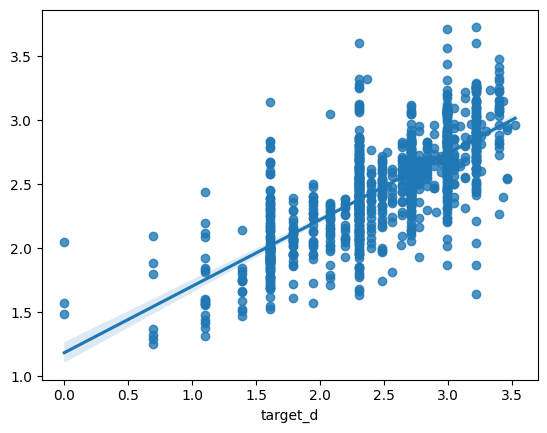

In [165]:
sns.regplot(x=y_test, y=predictions)

In [166]:
# Since we scaled the target variable, we need to inverse transform to get the original values in the $ unit:
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 5.179288905986628
MAE: 3.756991285161278


IMPORTANT: to interpret the results of the model, it is important to keep in mind that the averaged errors do not take into consideration the outliers. The outliers will still happen in real-life, therefore, these metrics are inflated (bigger than we will have in real-life). It is important to make that clear to you client/manager.

Next Steps:
* We could try log scaling the features as well;
* Add more data (rows) or more complexity (columns).

### Business Case Conclusions

First we need to understand the business problem proposed and translate it into a real-life scenario:

* We have a dataset containing information of donors, that donated in different donation campaigns. The target variable is the amount donated in the last campaign. 

* We are assuming that some study was made previously which proved that there was a relationship between the donations and the marketing mail that was sent to the potencial donors.

* Considering these assumptions, and using the data obtained from the last campaings, we want to save some money by not sending mail to people who are less likely to donate.

* The cost of the marketing mail is 0.68$.

Considering the results of the model, we could calculate our own metrics of success:
* How much money we saved from sending mail;
* How much money we would have missed from not sending mail to potencial donors.

For now, we are only analysing data from donors that donated in the last campaign, therefore we don't have target_d = 0, which does not allow us to proceed with the process for now.


![](https://media.npr.org/assets/img/2023/01/14/this-is-fine_custom-dcb93e90c4e1548ffb16978a5a8d182270c872a9.jpg)